In [56]:
import pandas as pd
from datetime import timedelta, datetime
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

from acquire import get_store_item_demand_data

In [91]:
df = get_store_item_demand_data()
df.head()

,item_id,sale_amount,sale_date,sale_id,store_id,store_address,store_city,store_state,store_zipcode,item_brand,item_name,item_price,item_upc12,item_upc14
0,1,13.0,"Tue, 01 Jan 2013 00:00:00 GMT",1,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013
1,1,11.0,"Wed, 02 Jan 2013 00:00:00 GMT",2,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013
2,1,14.0,"Thu, 03 Jan 2013 00:00:00 GMT",3,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013
3,1,13.0,"Fri, 04 Jan 2013 00:00:00 GMT",4,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013
4,1,10.0,"Sat, 05 Jan 2013 00:00:00 GMT",5,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013


In [58]:
df.isna().sum()

item_id          0
sale_amount      0
sale_date        0
sale_id          0
store_id         0
store_address    0
store_city       0
store_state      0
store_zipcode    0
item_brand       0
item_name        0
item_price       0
item_upc12       0
item_upc14       0
dtype: int64

In [59]:
df.shape

(913000, 14)

In [60]:
df.dtypes

item_id            int64
sale_amount      float64
sale_date         object
sale_id            int64
store_id           int64
store_address     object
store_city        object
store_state       object
store_zipcode      int64
item_brand        object
item_name         object
item_price       float64
item_upc12         int64
item_upc14         int64
dtype: object

Convert date column to datetime format. 

In [92]:
#from review, since GMT is not different, remove last thirteen characters (includes space after year and after seconds)
df.sale_date = df.sale_date.apply(lambda date: date[:-13])

In [93]:
df.sale_date = pd.to_datetime(df.sale_date, format = '%a, %d %b %Y')
df.dtypes

#setting exact format significantly reduces parsing time
#df.sale_date = pd.to_datetime(df.sale_date, format = '%a, %d %b %Y %H:%M:%S %Z') 

item_id                   int64
sale_amount             float64
sale_date        datetime64[ns]
sale_id                   int64
store_id                  int64
store_address            object
store_city               object
store_state              object
store_zipcode             int64
item_brand               object
item_name                object
item_price              float64
item_upc12                int64
item_upc14                int64
dtype: object

Plot the distribution of sale_amount and item_price. 

<AxesSubplot:>

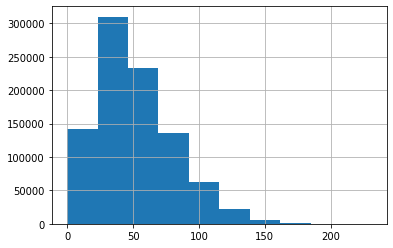

In [11]:
df.sale_amount.hist()

<AxesSubplot:>

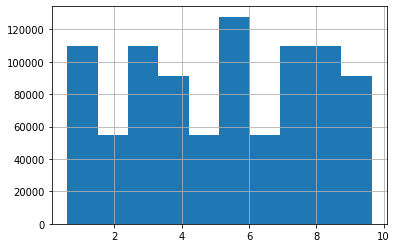

In [12]:
df.item_price.hist()

In [20]:
df.groupby('item_price').sale_amount.sum().reset_index()

,item_price,sale_amount
0,0.60,534094.0
1,0.68,803107.0
2,0.74,736892.0
3,0.84,401384.0
4,0.98,869981.0
5,1.16,602486.0
6,1.68,1405108.0
7,1.78,534979.0
8,1.79,938379.0
9,2.43,2142421.0


array([[<AxesSubplot:title={'center':'item_price'}>,
        <AxesSubplot:title={'center':'sale_amount'}>]], dtype=object)

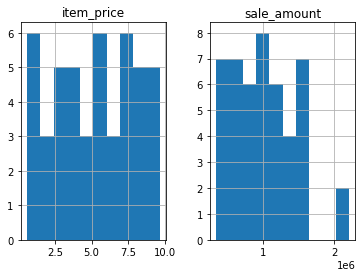

In [18]:
item_price_sales_totals = df.groupby('item_price').sale_amount.sum().reset_index()

item_price_sales_totals.hist()

Set the index to be the datetime variable.

In [21]:
#set date as index, sort index
df = df.set_index('sale_date').sort_index()


df.head()

,item_id,sale_amount,sale_id,store_id,store_address,store_city,store_state,store_zipcode,item_brand,item_name,item_price,item_upc12,item_upc14
sale_date,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,1,13.0,1,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013
2013-01-01 00:00:00+00:00,12,26.0,211817,7,12018 Perrin Beitel Rd,San Antonio,TX,78217,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211
2013-01-01 00:00:00+00:00,46,27.0,832657,7,12018 Perrin Beitel Rd,San Antonio,TX,78217,Mama Marys,Pizza Sauce,4.65,35457770664,35457770664
2013-01-01 00:00:00+00:00,12,54.0,213643,8,15000 San Pedro Ave,San Antonio,TX,78232,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211
2013-01-01 00:00:00+00:00,12,35.0,215469,9,735 SW Military Dr,San Antonio,TX,78221,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211


---

In [22]:
df.dtypes

item_id            int64
sale_amount      float64
sale_id            int64
store_id           int64
store_address     object
store_city        object
store_state       object
store_zipcode      int64
item_brand        object
item_name         object
item_price       float64
item_upc12         int64
item_upc14         int64
dtype: object

Add a 'month' and 'day of week' column to your dataframe.

In [23]:
df['month'] = df.index.month
df['day_of_week'] = df.index.day_name()
df.head()

,item_id,sale_amount,sale_id,store_id,store_address,store_city,store_state,store_zipcode,item_brand,item_name,item_price,item_upc12,item_upc14,month,day_of_week
sale_date,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,1,13.0,1,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,1,Tuesday
2013-01-01 00:00:00+00:00,12,26.0,211817,7,12018 Perrin Beitel Rd,San Antonio,TX,78217,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,1,Tuesday
2013-01-01 00:00:00+00:00,46,27.0,832657,7,12018 Perrin Beitel Rd,San Antonio,TX,78217,Mama Marys,Pizza Sauce,4.65,35457770664,35457770664,1,Tuesday
2013-01-01 00:00:00+00:00,12,54.0,213643,8,15000 San Pedro Ave,San Antonio,TX,78232,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,1,Tuesday
2013-01-01 00:00:00+00:00,12,35.0,215469,9,735 SW Military Dr,San Antonio,TX,78221,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,1,Tuesday


Add a column to your dataframe, sales_total, which is a derived from sale_amount (total items) and item_price. 

In [24]:
df['sales_total'] = df.sale_amount * df.item_price
df.head()

,item_id,sale_amount,sale_id,store_id,store_address,store_city,store_state,store_zipcode,item_brand,item_name,item_price,item_upc12,item_upc14,month,day_of_week,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,1,13.0,1,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,1,Tuesday,10.92
2013-01-01 00:00:00+00:00,12,26.0,211817,7,12018 Perrin Beitel Rd,San Antonio,TX,78217,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,1,Tuesday,218.40
2013-01-01 00:00:00+00:00,46,27.0,832657,7,12018 Perrin Beitel Rd,San Antonio,TX,78217,Mama Marys,Pizza Sauce,4.65,35457770664,35457770664,1,Tuesday,125.55
2013-01-01 00:00:00+00:00,12,54.0,213643,8,15000 San Pedro Ave,San Antonio,TX,78232,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,1,Tuesday,453.60
2013-01-01 00:00:00+00:00,12,35.0,215469,9,735 SW Military Dr,San Antonio,TX,78221,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,1,Tuesday,294.00


Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

In [121]:
def prep_store(df):
    #remove last 13 characters of sale_date
    df.sale_date = df.sale_date.apply(lambda date: date[:-13])
    
    #convert sale_date to datetime format
    df.sale_date = pd.to_datetime(df.sale_date, format = '%a, %d %b %Y')
    
    #set sale_date as index, sort index
    df = df.set_index('sale_date').sort_index()
    
    #rename sale_amount to quantity
    df = df.rename(columns = {'sale_amount': 'quantity'})
    
    #add month column
    df['month'] = df.index.month
    
    #add day of week column
    df['weekday'] = df.index.day_name()
    
    #add sales_total column
    df['sales_total'] = df.quantity * df.item_price
    
    return df

In [123]:
df = get_store_item_demand_data()

df = prep_store(df)
df.head()

,item_id,quantity,sale_id,store_id,store_address,store_city,store_state,store_zipcode,item_brand,item_name,item_price,item_upc12,item_upc14,month,weekday,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01,1,13.0,1,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,1,Tuesday,10.92
2013-01-01,12,26.0,211817,7,12018 Perrin Beitel Rd,San Antonio,TX,78217,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,1,Tuesday,218.40
2013-01-01,46,27.0,832657,7,12018 Perrin Beitel Rd,San Antonio,TX,78217,Mama Marys,Pizza Sauce,4.65,35457770664,35457770664,1,Tuesday,125.55
2013-01-01,12,54.0,213643,8,15000 San Pedro Ave,San Antonio,TX,78232,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,1,Tuesday,453.60
2013-01-01,12,35.0,215469,9,735 SW Military Dr,San Antonio,TX,78221,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,1,Tuesday,294.00


---

Using the OPS data acquired in the Acquire exercises opsd_germany_daily.csv, complete the following:

    Convert date column to datetime format.
    Plot the distribution of each of your variables.
    Set the index to be the datetime variable.
    Add a month and a year column to your dataframe.
    Fill any missing values.
    Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.


In [97]:
df = pd.read_csv('opsd.csv')
df.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [98]:
#from review, better way to change 'Wind+Solar' and making all columns lowercase

#remove '+' and make all columns lowercase
df.columns = [column.replace('+','_').lower() for column in df]

df.head()

,date,consumption,wind,solar,wind_solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


- #change wind+solar name
- df = df.rename(columns = {'Wind+Solar': 'wind_solar'})

- #convert all columns to lower case
- column_list = list(df.columns)
- df.columns = column_list
- df.columns = df.columns.str.lower()

- df.head()

In [99]:
df.dtypes

date            object
consumption    float64
wind           float64
solar          float64
wind_solar     float64
dtype: object

Convert date column to datetime format.

In [100]:
df.date = pd.to_datetime(df.date, format = '%Y %m %d')
df.dtypes

date           datetime64[ns]
consumption           float64
wind                  float64
solar                 float64
wind_solar            float64
dtype: object

def distribution (df):
    '''
    takes in a df and plot individual variable distributions excluding object type
    '''
    cols =df.columns.to_list()
    for col in cols:
        if df[col].dtype != 'object':
            plt.hist(df[col])
            plt.title(f'Distribution of {col}')
            plt.xlabel('values')
            plt.ylabel('Counts ')
            plt.show()

---

Plot the distribution of each of your variables.

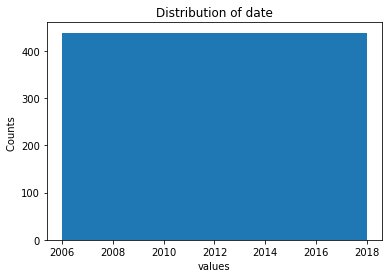

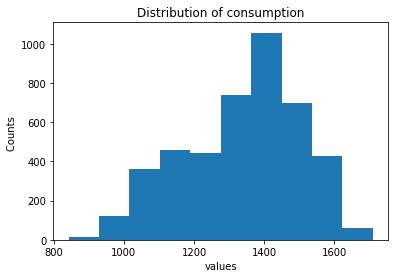

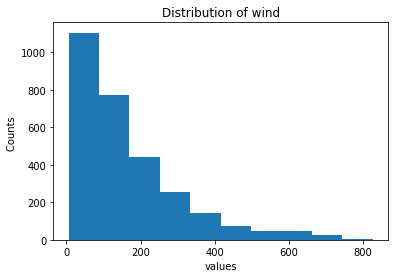

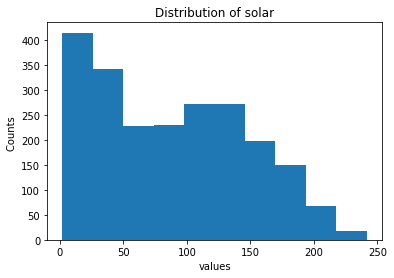

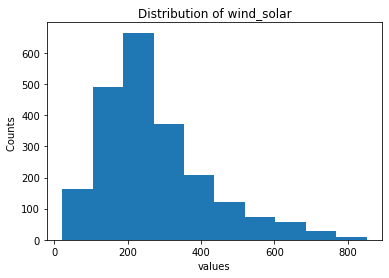

In [101]:
cols = df.columns.to_list()
for col in cols:
    if df[col].dtype != 'object':
        plt.hist(df[col])
        plt.title(f'Distribution of {col}')
        plt.xlabel('values')
        plt.ylabel('Counts ')
        plt.show()

---

Set the index to be the datetime variable.

In [102]:
#set date as index, sort index
df = df.set_index('date').sort_index()
df.head()

,consumption,wind,solar,wind_solar
date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN


---

Add a month and a year column to your dataframe.

In [103]:
df['month'] = df.index.month
df.head()

,consumption,wind,solar,wind_solar,month
date,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,1
2006-01-02,1380.521,NaN,NaN,NaN,1
2006-01-03,1442.533,NaN,NaN,NaN,1
2006-01-04,1457.217,NaN,NaN,NaN,1
2006-01-05,1477.131,NaN,NaN,NaN,1


In [104]:
#alternatively, can get month name
df['month_name'] = df.index.month_name()
df.head()

,consumption,wind,solar,wind_solar,month,month_name
date,,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,1,January
2006-01-02,1380.521,NaN,NaN,NaN,1,January
2006-01-03,1442.533,NaN,NaN,NaN,1,January
2006-01-04,1457.217,NaN,NaN,NaN,1,January
2006-01-05,1477.131,NaN,NaN,NaN,1,January


In [85]:
df['year'] = df.index.year
df.head()

,consumption,wind,solar,wind_solar,month,year
date,,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,1,2006
2006-01-02,1380.521,NaN,NaN,NaN,1,2006
2006-01-03,1442.533,NaN,NaN,NaN,1,2006
2006-01-04,1457.217,NaN,NaN,NaN,1,2006
2006-01-05,1477.131,NaN,NaN,NaN,1,2006


---

Fill any missing values.

In [86]:
df.isna().sum()
#should forward fill or back fill the null values, or fill with zeros. 

consumption       0
wind           1463
solar          2195
wind_solar     2196
month             0
year              0
dtype: int64

In [87]:
df.isnull().sum()

consumption       0
wind           1463
solar          2195
wind_solar     2196
month             0
year              0
dtype: int64

In [88]:
df.shape

(4383, 6)

In [77]:
#fill null values 
df = df.fillna(0)

In [90]:
#from review:

#add values of wind and solar together to get wind_solar
df['wind_solar'] = df.wind + df.solar

Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.


In [108]:
def prep_opsd(df):
    #remove '+' and make all columns lowercase
    df.columns = [column.replace('+','_').lower() for column in df]
    
    #convert date column to  datetime format
    df.date = pd.to_datetime(df.date, format = '%Y %m %d')
    
    #set date as index, sort index
    df = df.set_index('date').sort_index()
    
    #create month column
    df['month'] = df.index.month
    
    #create year column
    df['year'] = df.index.year

    #fill null values w/ 0
    df = df.fillna(0)
    
    #add values of wind and solar together to get wind_solar
    df['wind_solar'] = df.wind + df.solar
    
    return df

In [109]:
df = pd.read_csv('opsd.csv')

In [110]:
df = prep_opsd(df)
df.head()

,consumption,wind,solar,wind_solar,month,year
date,,,,,,
2006-01-01,1069.184,0.0,0.0,0.0,1,2006
2006-01-02,1380.521,0.0,0.0,0.0,1,2006
2006-01-03,1442.533,0.0,0.0,0.0,1,2006
2006-01-04,1457.217,0.0,0.0,0.0,1,2006
2006-01-05,1477.131,0.0,0.0,0.0,1,2006


---

In [ ]:
#review 
def prep_store_data(df):
    df.sale_date = df.sale_date.apply(lambda date: date[:-13])
    df.sale_date = pd.to_datetime(df.sale_date, format='%a, %d %b %Y')
    # make sure we sort by date/time before resampling or doing other time series manipulations
    df = df.set_index('sale_date').sort_index()
    df = df.rename(columns={'sale_amount': 'quantity'})
    df['month'] = df.index.strftime('%m-%b')
    df['dow'] = df.index.strftime('%w-%a')
    df['sales_total'] = df.quantity * df.item_price
    return df

def prep_opsd_data(df):
    df.columns = [column.replace('+','_').lower() for column in df]
    df.date = pd.to_datetime(df.date)
    df = df.set_index('date').sort_index()
    df['month'] = df.index.strftime('%m-%b')
    df['year'] = df.index.year
    df = df.fillna(0)
    df['wind_solar'] = df.wind + df.solar
    return df